<a href="https://colab.research.google.com/github/jsebastianquiroga/Big_Data_Derby_2022_SI/blob/main/Notebooks/Sistemas_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">




***Integrantes:***

**Joshep Andersson Blanco Reyes**

**Leonardo García Diaz**

**Juan Sebastián Quiroga Bernal**

# <img style="float: left; padding-right: 10px;" src="https://images7.alphacoders.com/671/671791.jpg"  height="300">




# Big Data Derby 2022

The goal of this competition is to analyze horse racing tactics, drafting strategies, and path efficiency. You will develop a model using never-before-released coordinate data along with basic race information.

Your work will help racing horse owners, trainers, and veterinarians better understand how equine performance and welfare fit together. With better data analysis, equine welfare could significantly improve.

https://www.kaggle.com/competitions/big-data-derby-2022/overview




## ***Paquetes de conexión***

In [226]:

# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
import pandas as pd
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [227]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

nyra_2019_complete = '1AAshxhslPjhxg-UC86f9Z97s3W81nayF' #<-- Key del file en drive (nyra_2019_complete.csv 610 mb)
# nyra_race_table    = '1KtYQEvt4pboSqs7bO6jfdCHADo9PMzo9'#<-- Key del file en drive (nyra_race_table.csv 93 kb)
# nyra_start_table   = '1LYUx_De3U7TBw6GgqRk6whVzMjuJjSaz'#<-- Key del file en drive (nyra_start_table.csv 722 Kb)
# nyra_tracking_table= '15y4AtfLiyop9FWdc0SRaMUs-jKgnOppl'#<-- Key del file en drive (nyra_tracking_table.csv 320,7 mb)


download = drive.CreateFile({'id': nyra_2019_complete}) 
# Download the file to a local disc
download.GetContentFile('nyra_2019_complete.csv')
dtype_dict = {"track_id": object ,
              "race_date" :object, #will be read with "parse_dates" parameter
              "race_number" : np.int8, 
              "program_number" : object,
              "trakus_index" : np.int16,  
              "latitude" : np.float64,
              "longitude" : np.float64,
              "distance_id" : np.int16,  
              "course_type" : object, 
              "track_condition" : object,
              "run_up_distance" : np.int8,  
              "race_type" : object, 
              "purse" : np.int32,  
              "post_time" : np.int16,  
              "weight_carried" : np.int16,  
              "jockey" : object, 
              "odds" : np.int16,
              "position_at_finish":np.int8
             }
nyra_2019 = pd.read_csv('nyra_2019_complete.csv', header=None,dtype=dtype_dict,parse_dates=[1])
nyra_2019.columns= dtype_dict.keys()


# download = drive.CreateFile({'id': nyra_race_table}) 
# # Download the file to a local disc
# download.GetContentFile('nyra_race_table.csv')
# nyra_race  = pd.read_csv("nyra_race_table.csv")
# nyra_race.head()

# download = drive.CreateFile({'id': nyra_start_table}) 
# # Download the file to a local disc
# download.GetContentFile('nyra_start_table.csv')
# nyra_start  = pd.read_csv("nyra_start_table.csv", header=None)



# download = drive.CreateFile({'id': nyra_start_table}) 
# # Download the file to a local disc
# download.GetContentFile('nyra_tracking_table.csv')
# nyra_tracking  = pd.read_csv("nyra_tracking_table.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [228]:
nyra_2019.info()
nyra_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   track_id            object        
 1   race_date           datetime64[ns]
 2   race_number         int64         
 3   program_number      object        
 4   trakus_index        int64         
 5   latitude            float64       
 6   longitude           float64       
 7   distance_id         int64         
 8   course_type         object        
 9   track_condition     object        
 10  run_up_distance     int64         
 11  race_type           object        
 12  purse               float64       
 13  post_time           int64         
 14  weight_carried      int64         
 15  jockey              object        
 16  odds                int64         
 17  position_at_finish  int64         
dtypes: datetime64[ns](1), float64(3), int64(8), object(6)
memory usage: 718.0+ MB


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


Se removerán las variables de trakus_index, latitude, longitude, ya que son información geolocalizada tomada durante la carrera, con el fin de predecir que caballo puede ganar antes de la carrera no tiene relación, ademas se creo una llave única para identificar cada carrera individualmente para un total de 2000 carreras.

In [229]:
nyra_2019 = nyra_2019.drop(['latitude', 'longitude', 'trakus_index'], axis=1)
nyra_2019['unique_id'] = nyra_2019.track_id.astype(str) + '_' + nyra_2019.race_date.astype(str) + '_' + nyra_2019.race_number.astype(str)
print(nyra_2019.unique_id.value_counts())
nyra_2019

SAR_2019-07-25_1    9862
BEL_2019-09-19_1    9558
SAR_2019-08-22_1    8280
SAR_2019-07-24_1    7542
AQU_2019-11-03_8    7248
                    ... 
BEL_2019-06-26_6     984
BEL_2019-06-14_5     980
AQU_2019-03-02_3     882
BEL_2019-06-21_6     840
BEL_2019-06-28_4     774
Name: unique_id, Length: 2000, dtype: int64


,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish,unique_id
0,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
1,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
2,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
3,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
4,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228425,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9
5228426,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9
5228427,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9
5228428,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9


In [230]:
nyra_2019['unique_id'].nunique()

2000

Se eliminaran los valores repetidos, dejando solo una observación por caballo

In [231]:
nyra_2019 = nyra_2019.drop_duplicates()

## ***EDA***

In [232]:
nyra_2019['track_id'].count()

15081

In [233]:
nyra_2019['track_id'].value_counts(normalize=True) * 100

AQU    41.409721
BEL    37.219017
SAR    21.371262
Name: track_id, dtype: float64

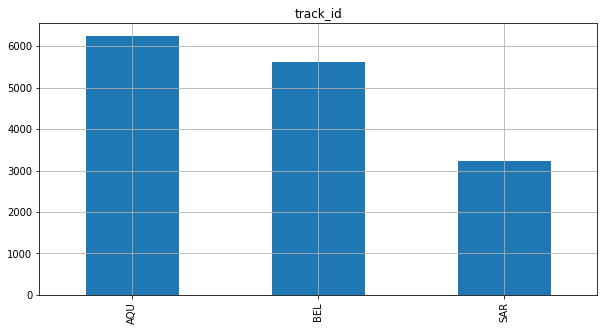

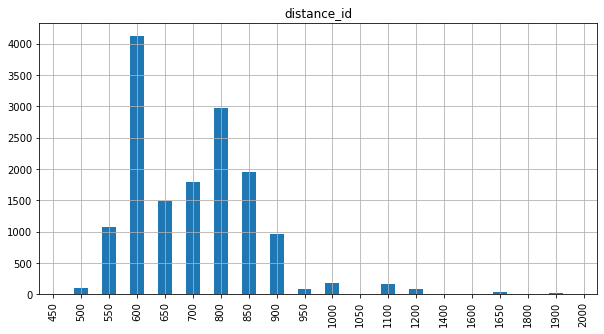

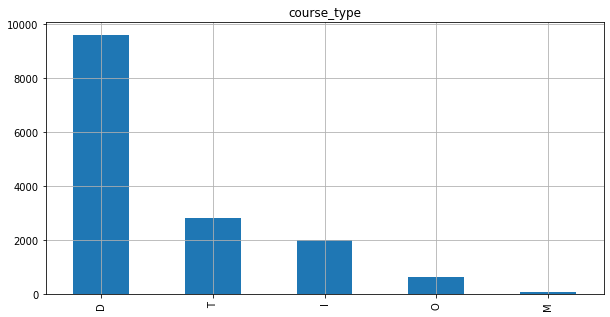

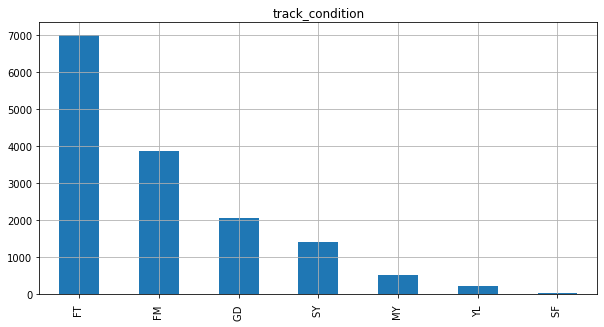

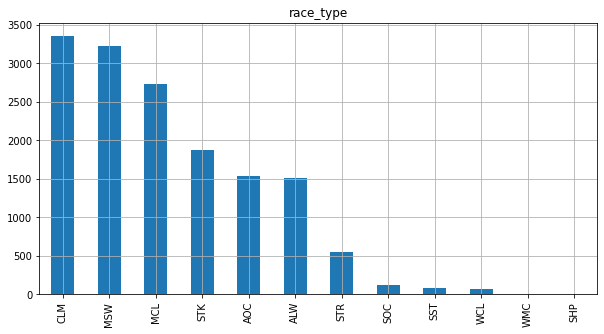

In [234]:
categorical_features = ['track_id','distance_id','course_type','track_condition','race_type']
for f in categorical_features:
    plt.figure(figsize=(10,5))
    if (f=='distance_id'):
        nyra_2019[f].value_counts().sort_index().plot(kind='bar')
    else:
        nyra_2019[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

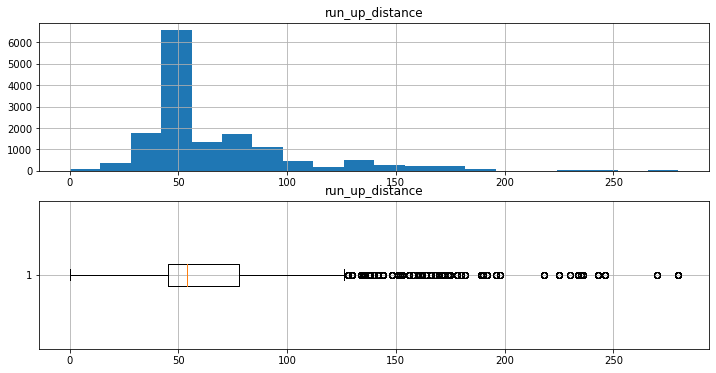

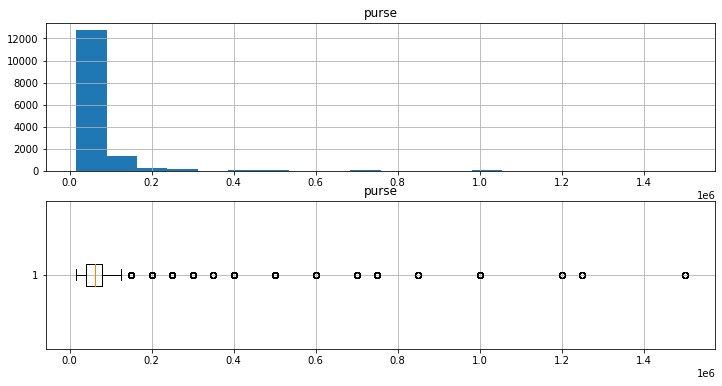

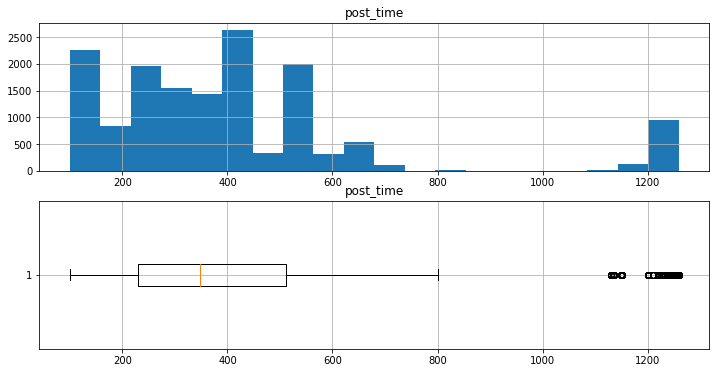

In [235]:
numerical_features = ['run_up_distance','purse','post_time']
for f in numerical_features:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))
    
    ax1.hist(nyra_2019[f], bins=20)
    ax1.grid()
    ax1.set_title(f)
    
    ax2.boxplot(nyra_2019[f], vert=False)
    ax2.grid()   
    ax2.set_title(f)
    
    plt.show()
    print('')

Text(0.5, 1.0, 'Pearson Correlation')

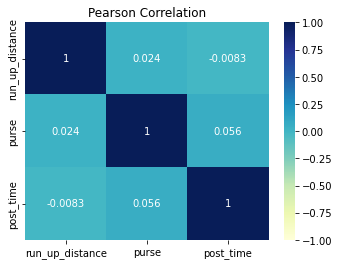

In [300]:
corr_pearson = nyra_2019[numerical_features].corr(method='pearson')
plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='YlGnBu', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

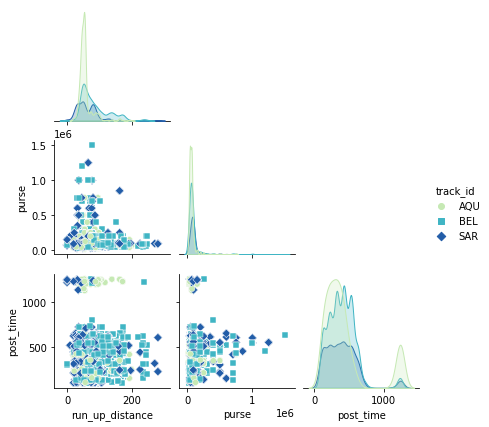

In [301]:
sns.pairplot(nyra_2019, vars=numerical_features,
             hue='track_id',
             height=2.0, markers=["o", "s", "D"],
             palette='YlGnBu',
             corner=True)
plt.show()

### ***Comparativo variables vs variable de respuesta (position_at_finish)***

In [238]:
pd.crosstab(index=nyra_2019['track_id'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
track_id,,,,,,,,,,,,,,
AQU,41.127039,41.028176,41.345203,41.223272,41.23030,41.506130,41.245136,41.043084,42.439863,41.904762,47.500,47.191011,85.714286,50.0
BEL,38.704894,38.853188,38.328388,38.438588,38.58668,37.069469,34.941634,33.560091,30.584192,30.476190,31.875,33.707865,14.285714,50.0
SAR,20.168067,20.118636,20.326409,20.338140,20.18302,21.424402,23.813230,25.396825,26.975945,27.619048,20.625,19.101124,0.000000,0.0


In [239]:
s =pd.crosstab(index=nyra_2019['track_id'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=1)
s

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
track_id,,,,,,,,,,,,,,
AQU,13.322658,13.290633,13.386709,13.274620,12.986389,11.385108,8.486789,5.796637,3.955164,2.113691,1.216974,0.672538,0.096077,0.016013
BEL,13.949759,14.003207,13.807233,13.771602,13.522181,11.313023,7.999287,5.273472,3.171210,1.710315,0.908605,0.534474,0.017816,0.017816
SAR,12.659013,12.627986,12.752094,12.690040,12.317716,11.386907,9.494260,6.950047,4.871238,2.699348,1.023891,0.527459,0.000000,0.000000


Se obtienen las distribuciones de los tacks ID, el 41% del total de los datos tienen relación con el track id AQU.

Se identifica que en la posisión 13 el 80% de las observaciones tienen relación con ese track ID.

Inicialmente en Saratoga, se identifiarón datos hasta las pocisiones 12, puede ser que en esta pista corran menos caballos en total.

Se observa una decrecimiento porcentual en la cantidad de observaciones, en las posiones 13 y 14.

In [240]:
x = pd.crosstab(index=nyra_2019['race_date'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)

x

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
race_date,,,,,,,,,,,,,,
2019-01-01,0.494315,0.444884,0.445104,0.447539,0.457550,0.467017,0.466926,0.226757,0.171821,0.000000,0.000,0.000000,0.000000,0.0
2019-01-04,0.395452,0.395452,0.395648,0.397812,0.406711,0.467017,0.233463,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
2019-01-05,0.494315,0.444884,0.445104,0.447539,0.508388,0.525394,0.466926,0.340136,0.171821,0.000000,0.000,0.000000,0.000000,0.0
2019-01-06,0.395452,0.395452,0.395648,0.397812,0.355872,0.291886,0.233463,0.340136,0.171821,0.000000,0.000,0.000000,0.000000,0.0
2019-01-10,0.247158,0.247158,0.247280,0.248633,0.254194,0.233508,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-22,0.494315,0.494315,0.494560,0.497265,0.508388,0.583771,0.544747,0.453515,0.515464,0.634921,0.625,1.123596,14.285714,0.0
2019-12-28,0.444884,0.444884,0.445104,0.447539,0.457550,0.525394,0.544747,0.680272,0.687285,0.952381,1.875,3.370787,14.285714,0.0
2019-12-29,0.444884,0.444884,0.445104,0.447539,0.457550,0.408640,0.544747,0.566893,0.687285,0.952381,0.625,0.000000,0.000000,0.0


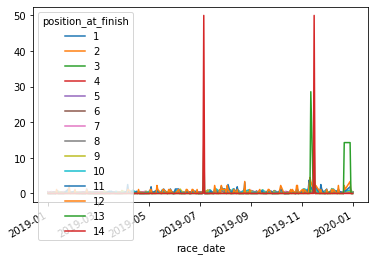

In [241]:
x.plot()

Se evidencia un incremento en 3 fechas especificas de la existencia de los puntos 13 y 14. pareceria ser un comportamiento atipico.

In [242]:
nyra_2019['race_number'].value_counts(normalize=True) * 100

6     11.305616
8     11.053644
5     10.947550
7     10.629269
4     10.297726
2     10.005968
3      9.528546
9      9.269942
1      9.163849
10     5.145547
11     1.863272
12     0.623301
13     0.165772
Name: race_number, dtype: float64

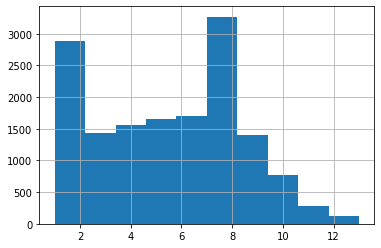

In [243]:
nyra_2019['race_number'].hist()

In [244]:
xp = pd.crosstab(index=nyra_2019['race_number'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
xp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
race_number,,,,,,,,,,,,,,
1,10.726644,10.973801,10.633037,10.790651,10.676157,8.698190,6.303502,4.421769,3.436426,2.539683,1.875,1.123596,0.000000,0.0
2,10.776075,10.776075,10.880317,10.790651,10.879512,9.924110,9.182879,7.256236,6.701031,6.349206,4.375,4.494382,0.000000,0.0
3,10.776075,10.776075,10.979228,10.641472,10.269446,9.165207,7.392996,6.349206,5.326460,4.761905,3.750,3.370787,0.000000,0.0
4,10.776075,10.776075,10.781405,10.740925,10.777834,10.566258,10.894942,9.863946,6.872852,5.079365,2.500,3.370787,0.000000,0.0
5,10.677212,10.578349,10.830861,10.691198,10.828673,11.208406,11.673152,12.244898,12.027491,9.523810,8.125,10.112360,14.285714,50.0
6,10.528917,10.677212,10.484669,10.641472,10.472801,11.675423,12.684825,13.832200,13.402062,13.650794,14.375,15.730337,14.285714,0.0
7,10.627781,10.825507,10.435213,10.641472,10.676157,11.091652,11.361868,10.430839,10.137457,9.841270,5.625,6.741573,14.285714,0.0
8,10.627781,10.479486,10.583581,10.740925,10.828673,11.383538,11.673152,12.244898,12.886598,11.428571,13.750,11.235955,14.285714,0.0
9,8.255067,7.958478,8.110781,8.055694,8.185053,9.281961,10.116732,11.791383,14.432990,16.507937,22.500,17.977528,14.285714,50.0


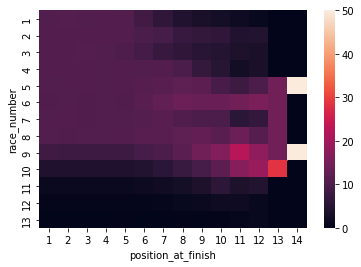

In [245]:
sns.heatmap(xp)

Se observan que en las carreras 5 y 9 solo se presentarón posiciones 14, y referente a la 13 solo se presentan datos de la carera 5-10 (solo el 38% de las occurrencias)

In [246]:
nyra_2019['program_number'].value_counts(normalize=True) * 100

3      7.346993
4      7.287315
2      7.221007
5      7.194483
1      7.141436
6      6.710430
7      5.682647
5      4.429414
8      4.416153
4      4.396260
6      4.382998
3      4.369737
1      4.303428
2      4.276905
7      3.613819
9      3.269014
8      2.731914
10     2.300908
9      1.816856
11     1.399111
10     1.299649
1A     1.087461
12     0.875274
11     0.848750
12     0.470791
13     0.324912
13     0.192295
14     0.159141
14     0.139248
15     0.086201
15     0.072939
2B     0.072939
16     0.039785
16     0.026523
3X     0.006631
1X     0.006631
Name: program_number, dtype: float64

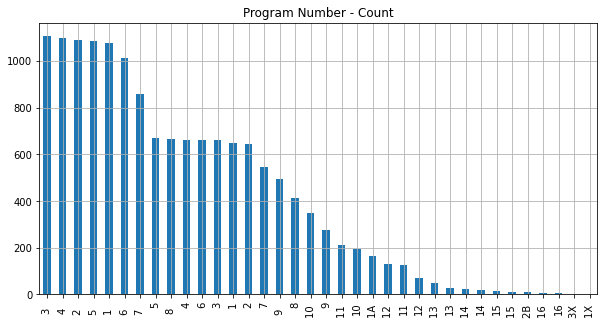

In [247]:
plt.figure(figsize=(10,5))
nyra_2019.program_number.value_counts().plot(kind='bar')
plt.title('Program Number - Count')
plt.grid()
plt.show()

In [248]:
xpp = pd.crosstab(index=nyra_2019['program_number'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
xpp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
program_number,,,,,,,,,,,,,,
1,4.597133,4.597133,4.500495,4.624565,4.677173,4.144775,4.669261,2.947846,2.577320,3.174603,1.250,3.370787,0.000000,0.0
2,4.695996,4.745428,4.005935,5.768274,4.168785,4.144775,3.346304,3.514739,2.577320,3.174603,1.875,2.247191,0.000000,0.0
3,5.091448,4.399407,4.797230,4.375932,4.422979,4.203152,4.124514,4.308390,3.264605,1.904762,3.125,2.247191,0.000000,0.0
4,4.794859,4.992585,4.005935,4.674291,4.982206,3.619381,4.513619,3.287982,3.608247,3.809524,3.750,4.494382,0.000000,0.0
5,5.190311,3.954523,5.093966,3.928394,4.778851,4.611792,5.058366,3.514739,2.920962,2.539683,3.125,2.247191,0.000000,0.0
6,3.855660,5.289174,4.549951,4.525112,4.880529,4.319907,3.735409,4.308390,3.780069,2.857143,3.125,1.123596,0.000000,0.0
7,3.608502,2.965892,3.560831,3.530582,4.117946,4.203152,3.190661,3.854875,3.264605,4.444444,3.750,1.123596,14.285714,0.0
8,2.570440,2.965892,2.423343,2.436599,2.440264,2.743724,3.346304,3.628118,3.608247,2.222222,2.500,0.000000,0.000000,0.0
9,1.285220,1.334652,1.434224,1.442069,1.372649,1.868068,1.789883,4.195011,3.951890,3.809524,5.000,1.123596,0.000000,0.0


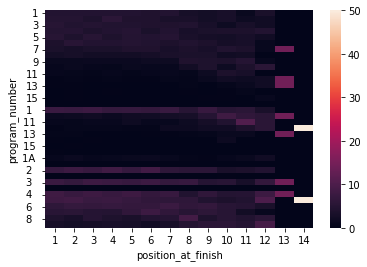

In [249]:
sns.heatmap(xpp)

Se observa que el numero de programa 4, tiene el 8% de observaciones que terminaron en la primera poción, mayor que el resto de obervaciones.

In [250]:
nyra_2019['distance_id'].value_counts(normalize=True) * 100

600     27.372190
800     19.693654
850     12.916915
700     11.849347
650      9.846827
550      7.108282
900      6.405411
1000     1.259863
1100     1.067568
500      0.676348
950      0.543731
1200     0.530469
1650     0.285127
1900     0.099463
450      0.079570
2000     0.066309
1600     0.053047
1800     0.053047
1400     0.046416
1050     0.046416
Name: distance_id, dtype: float64

In [251]:
px = pd.crosstab(index=nyra_2019['distance_id'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
px

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
distance_id,,,,,,,,,,,,,,
450,0.098863,0.098863,0.098912,0.099453,0.101678,0.116754,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
500,0.889768,0.889768,0.890208,0.845351,0.711744,0.642148,0.389105,0.113379,0.000000,0.000000,0.000,0.000000,0.000000,0.0
550,6.574394,6.574394,6.528190,6.514172,6.659888,6.713368,7.859922,9.863946,10.137457,10.476190,7.500,5.617978,0.000000,0.0
600,27.236777,27.236777,27.101879,27.200398,27.249619,27.904262,27.548638,26.984127,27.663230,29.206349,26.875,29.213483,42.857143,0.0
650,9.787444,9.738013,9.792285,9.845848,9.913574,9.982487,9.649805,10.317460,9.278351,7.936508,10.000,15.730337,42.857143,50.0
700,12.011864,12.110727,12.215628,12.133267,11.997966,11.908932,12.451362,10.997732,10.481100,9.206349,8.750,7.865169,0.000000,0.0
800,20.069204,20.069204,20.079130,20.039781,20.030503,20.023351,18.754864,18.934240,18.384880,18.095238,18.125,12.359551,0.000000,0.0
850,12.605042,12.456747,12.561820,12.580806,12.608033,12.084063,13.229572,13.492063,14.261168,17.777778,19.375,22.471910,0.000000,0.0
900,6.920415,6.969847,6.923838,6.862258,6.914082,6.421483,5.680934,4.875283,5.498282,2.539683,3.125,0.000000,0.000000,0.0


In [252]:
nyra_2019['course_type'].value_counts(normalize=True) * 100

D    63.463961
T    18.639348
I    13.274982
O     4.117764
M     0.503945
Name: course_type, dtype: float64

In [253]:
pxp = pd.crosstab(index=nyra_2019['course_type'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
pxp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
course_type,,,,,,,,,,,,,,
D,67.523480,67.375185,67.556874,67.429140,66.802237,64.098074,57.898833,52.721088,47.766323,38.730159,38.750,35.955056,57.142857,50.0
I,12.456747,12.407316,12.413452,12.580806,12.709710,13.485114,14.785992,15.873016,15.807560,16.825397,15.000,14.606742,14.285714,50.0
M,0.444884,0.444884,0.445104,0.447539,0.457550,0.642148,0.700389,0.566893,0.515464,0.317460,0.625,1.123596,0.000000,0.0
O,3.311913,3.361345,3.412463,3.281949,3.355363,3.736135,4.902724,6.009070,7.560137,9.841270,10.000,13.483146,28.571429,0.0
T,16.262976,16.411270,16.172107,16.260567,16.675140,18.038529,21.712062,24.829932,28.350515,34.285714,35.625,34.831461,0.000000,0.0


In [254]:
nyra_2019['track_condition'].value_counts(normalize=True) * 100

FT     46.349712
FM     25.621643
GD     13.619786
SY      9.389298
MY      3.368477
YL      1.525098
SF      0.125986
Name: track_condition, dtype: float64

In [255]:
pxp = pd.crosstab(index=nyra_2019['track_condition'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
pxp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
track_condition,,,,,,,,,,,,,,
FM,22.787939,22.787939,22.848665,22.824465,23.182511,24.985406,29.416342,33.560091,36.769759,40.317460,46.250,49.438202,42.857143,50.0
FT,48.739496,48.788927,48.961424,48.781701,48.754448,47.285464,42.412451,39.229025,36.082474,30.793651,29.375,30.337079,57.142857,50.0
GD,12.605042,12.703905,12.462908,12.729985,12.811388,13.660245,15.408560,15.646259,17.697595,21.904762,16.875,14.606742,0.000000,0.0
MY,3.657934,3.707365,3.659743,3.679761,3.609558,3.677758,3.035019,2.494331,2.061856,0.634921,1.250,0.000000,0.000000,0.0
SF,0.148295,0.148295,0.148368,0.149180,0.152517,0.116754,0.077821,0.113379,0.000000,0.000000,0.000,0.000000,0.000000,0.0
SY,10.528917,10.331191,10.385757,10.343113,9.964413,8.639813,7.937743,7.482993,6.185567,5.079365,5.000,4.494382,0.000000,0.0
YL,1.532378,1.532378,1.533136,1.491795,1.525165,1.634559,1.712062,1.473923,1.202749,1.269841,1.250,1.123596,0.000000,0.0


In [256]:
nyra_2019['race_type'].value_counts(normalize=True) * 100

CLM    22.286321
MSW    21.397785
MCL    18.095617
STK    12.419601
AOC    10.204894
ALW    10.065646
STR     3.627080
SOC     0.769180
SST     0.517207
WCL     0.464160
WMC     0.079570
SHP     0.072939
Name: race_type, dtype: float64

In [257]:
rt = pd.crosstab(index=nyra_2019['race_type'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
rt

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
race_type,,,,,,,,,,,,,,
ALW,9.639150,9.688581,9.545005,9.845848,9.710219,9.924110,10.661479,10.430839,12.027491,12.380952,13.125,16.853933,14.285714,0.0
AOC,11.468117,11.566980,11.325420,11.437096,11.082867,10.449504,8.171206,6.689342,5.326460,5.079365,3.125,1.123596,0.000000,0.0
CLM,23.529412,23.578843,23.590504,23.321730,22.979156,22.358435,22.101167,19.501134,17.353952,12.380952,11.875,11.235955,28.571429,0.0
MCL,16.213544,16.114681,16.221563,16.310293,16.675140,17.629889,19.688716,23.129252,24.742268,29.841270,36.250,37.078652,28.571429,50.0
MSW,20.415225,20.316362,20.524233,20.188961,20.589731,21.015762,22.957198,25.396825,26.804124,29.206349,20.625,19.101124,0.000000,0.0
SHP,0.098863,0.098863,0.098912,0.099453,0.101678,0.058377,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
SOC,0.889768,0.939199,0.890208,0.895077,0.965938,0.817280,0.700389,0.113379,0.000000,0.000000,0.000,0.000000,0.000000,0.0
SST,0.494315,0.494315,0.544016,0.546992,0.508388,0.525394,0.466926,0.566893,0.859107,0.317460,0.000,0.000000,0.000000,0.0
STK,12.852200,12.852200,12.957468,12.978618,13.014743,12.784588,11.439689,10.884354,9.450172,8.253968,12.500,10.112360,14.285714,50.0


Se eliminan las obervaciones de las posiciones 13 y 14

In [258]:
nyra_2019 = nyra_2019[(nyra_2019['position_at_finish']!=13)&(nyra_2019['position_at_finish']!=14)]

In [259]:
nyra_2019.jockey.value_counts()

Manuel Franco      1288
Dylan Davis        1117
Jose Lezcano        999
Junior Alvarado     862
Irad Ortiz Jr.      808
                   ... 
Cory Orm              1
Martin Chuan          1
Navin Mangalee        1
Dana G. Whitney       1
Tony Piccone          1
Name: jockey, Length: 177, dtype: int64

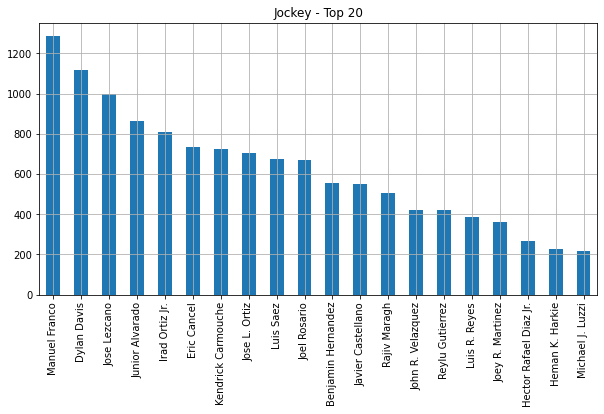

In [260]:
plt.figure(figsize=(10,5))

nyra_2019.jockey.value_counts()[0:20].plot(kind='bar')

plt.title('Jockey - Top 20')

plt.grid()

plt.show()

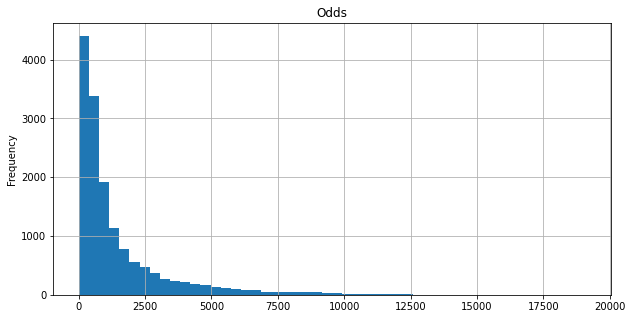

In [261]:
plt.figure(figsize=(10,5))
nyra_2019.odds.plot(kind='hist', bins=50)
plt.title('Odds')
plt.grid()
plt.show()

#***Modelo Naive*** 
## Sistema de reglas de asociación.

Entendiendo que las variables que trackean cada 15 segundos la posición en la carrera (latitud, longitud y track index), vamos inicialmente a tomar los valores únicos para que éstos sirvan para hacer una predicción sencilla, tanto de reglas, como de red neuronal.

In [262]:
nyra_2019_naive = nyra_2019[[
    "track_id",
    "race_date",
    "race_number",
    "program_number",
    "distance_id",
    "course_type",
    "track_condition",
    "run_up_distance",
    "race_type",
    "purse",
    "weight_carried",
    "odds",
    "position_at_finish",
    "jockey"
]]
nyra_2019_naive.head()

,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,weight_carried,odds,position_at_finish,jockey
0,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,120,2090,8,Andre Shivnarine Worrie
297,AQU,2019-04-19,7,2,600,O,FM,58,CLM,62000.0,120,335,2,Manuel Franco
572,BEL,2019-05-25,10,9,600,I,FM,90,AOC,85000.0,121,2525,9,Dylan Davis
845,BEL,2019-06-09,6,6,600,I,FM,112,CLM,60000.0,123,1300,8,Manuel Franco
1125,SAR,2019-07-27,3,6,550,T,GD,74,CLM,52000.0,122,1210,10,Irad Ortiz Jr.


In [263]:
nyra_2019_naive=nyra_2019_naive.drop_duplicates()

Teniendo los datos únicos por carrera podemos ejecutar un modelo naive y un modelo de red neuronal.

Para este caso vamos a intentar predecir si el caballo quedó entre los ***cinco primeros*** (Variable categórica) y así hacer una matriz de confusión con los aciertos.

In [264]:
nyra_2019_naive['First_3'] = 'Unknown'
nyra_2019_naive.loc[nyra_2019_naive['position_at_finish'].between(0, 3, inclusive=False), 'First_3'] = 1
nyra_2019_naive.loc[nyra_2019_naive['position_at_finish'].between(3, 60, inclusive=True), 'First_3'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  This is separate from the ipykernel package so we can avoid doing imports until


El modelo Naive más sencillo es ordenar los odds de menor a mayor, porque a mayor odds las casas de apuestas pagan más, esto quiere decir que si las casas de apuestas tienen un odds muy bajo, es porque probablemente el corredor va a ganar la carrera.

In [265]:
nyra_2019_naive=nyra_2019_naive.sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
nyra_2019_naive.head()

,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,weight_carried,odds,position_at_finish,jockey,First_3
867100,AQU,2019-01-01,1,1,650,D,MY,36,AOC,80000.0,123,130,2,Dylan Davis,1
1212009,AQU,2019-01-01,1,3,650,D,MY,36,AOC,80000.0,118,180,4,Jose Lezcano,0
1133406,AQU,2019-01-01,1,2,650,D,MY,36,AOC,80000.0,120,295,3,Junior Alvarado,0
190586,AQU,2019-01-01,1,5,650,D,MY,36,AOC,80000.0,118,1150,1,Manuel Franco,1
2013410,AQU,2019-01-01,1,4,650,D,MY,36,AOC,80000.0,123,1280,5,Jomar Garcia,0


In [266]:
nyra_2019_naive

,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,weight_carried,odds,position_at_finish,jockey,First_3
867100,AQU,2019-01-01,1,1,650,D,MY,36,AOC,80000.0,123,130,2,Dylan Davis,1
1212009,AQU,2019-01-01,1,3,650,D,MY,36,AOC,80000.0,118,180,4,Jose Lezcano,0
1133406,AQU,2019-01-01,1,2,650,D,MY,36,AOC,80000.0,120,295,3,Junior Alvarado,0
190586,AQU,2019-01-01,1,5,650,D,MY,36,AOC,80000.0,118,1150,1,Manuel Franco,1
2013410,AQU,2019-01-01,1,4,650,D,MY,36,AOC,80000.0,123,1280,5,Jomar Garcia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838522,AQU,2019-12-31,8,2,600,D,SY,45,MCL,33000.0,112,1850,6,Luis Cardenas,0
2236870,AQU,2019-12-31,8,10,600,D,SY,45,MCL,33000.0,117,4725,9,Leonardo Corujo,0
3644262,AQU,2019-12-31,8,7,600,D,SY,45,MCL,33000.0,122,6650,10,Gary Richards,0
2361167,AQU,2019-12-31,8,5,600,D,SY,45,MCL,33000.0,122,8100,3,Dalton Brown,0


In [267]:
##Carrera de ejemplo

nyra_2019_naive[(nyra_2019_naive['race_date']=='2019-01-01') & (nyra_2019_naive['race_number'] == 9)].sort_values(by='odds', ascending=True, na_position='first')


,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,weight_carried,odds,position_at_finish,jockey,First_3
166124,AQU,2019-01-01,9,3,600,D,GD,48,CLM,25000.0,113,110,1,Benjamin Hernandez,1
151952,AQU,2019-01-01,9,4,600,D,GD,48,CLM,25000.0,122,335,6,Joel Sone,0
599439,AQU,2019-01-01,9,7,600,D,GD,48,CLM,25000.0,124,395,7,Manuel Franco,0
673464,AQU,2019-01-01,9,8,600,D,GD,48,CLM,25000.0,115,850,3,Reylu Gutierrez,0
430483,AQU,2019-01-01,9,9,600,D,GD,48,CLM,25000.0,113,1960,5,Joey R. Martinez,0
0,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,120,2090,8,Andre Shivnarine Worrie,0
1074184,AQU,2019-01-01,9,10,600,D,GD,48,CLM,25000.0,120,2370,2,Luis R. Reyes,1
801924,AQU,2019-01-01,9,11,600,D,GD,48,CLM,25000.0,120,3000,4,Rajiv Maragh,0
1041196,AQU,2019-01-01,9,1,600,D,GD,48,CLM,25000.0,120,5100,9,Harry Hernandez,0


Tomando la carrera 9 del primero de enero del 2019, podemos observar que si ordenamos por odds, de las primeras 3 posiciones reales, el odd estuvo en una de ellas (acertó el ganador.)

Esta lógica es importante porque al separar el train y el test las predicciones no son independientes, y se debe hacer esta separación por carreras (80% carreras en train y 20% de carreras en test).

En éste caso vamos a predecir como los primeros 3 a los odds más bajos, como los que llegaron de primeras, esta sería nuestra predicción.

In [268]:
first_ods=nyra_2019_naive.groupby(["race_date", "race_number"]).head(3).reset_index(
    drop=True
).sort_values(
    by=["race_date", "track_id", "race_number", "odds"],
    ascending=True,
    na_position="first",
)

first_ods['prediction'] = '1'
first_ods=first_ods[['race_date','race_number','program_number', 'prediction']]

Ahora vamos a integrar esta predicción naive a la base inicial.

In [269]:
nyra_2019_naive=nyra_2019_naive.merge(first_ods, on=['race_date','race_number','program_number'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
nyra_2019_naive['prediction'] = nyra_2019_naive['prediction'].fillna(0)
nyra_2019_naive

,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,weight_carried,odds,position_at_finish,jockey,First_3,prediction
0,AQU,2019-01-01,1,1,650,D,MY,36,AOC,80000.0,123,130,2,Dylan Davis,1,1
1,AQU,2019-01-01,1,3,650,D,MY,36,AOC,80000.0,118,180,4,Jose Lezcano,0,1
2,AQU,2019-01-01,1,2,650,D,MY,36,AOC,80000.0,120,295,3,Junior Alvarado,0,1
3,AQU,2019-01-01,1,5,650,D,MY,36,AOC,80000.0,118,1150,1,Manuel Franco,1,0
4,AQU,2019-01-01,1,4,650,D,MY,36,AOC,80000.0,123,1280,5,Jomar Garcia,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,AQU,2019-12-31,8,2,600,D,SY,45,MCL,33000.0,112,1850,6,Luis Cardenas,0,0
15068,AQU,2019-12-31,8,10,600,D,SY,45,MCL,33000.0,117,4725,9,Leonardo Corujo,0,0
15069,AQU,2019-12-31,8,7,600,D,SY,45,MCL,33000.0,122,6650,10,Gary Richards,0,0
15070,AQU,2019-12-31,8,5,600,D,SY,45,MCL,33000.0,122,8100,3,Dalton Brown,0,0


## Métricas regla de asociación

El modelo acierta en un 69% de las veces si la posición estará dentro o fuera del top 3 de la carrera, el tener una precisión mayor al 50% se admite como modelo naive.

Recordar que la matriz de confusión de sklearn se muestra el revés, es decir la clase 1,1 (está en el top tres) es la de 2.692.
https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124

In [270]:
nyra_2019_naive['First_3']=nyra_2019_naive['First_3'].astype(int)
nyra_2019_naive['prediction']=nyra_2019_naive['prediction'].astype(int)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_score(nyra_2019_naive['First_3'], nyra_2019_naive['prediction'], normalize=True)


0.6906847133757962

In [271]:
nyra_2019_naive['prediction'] = nyra_2019_naive['prediction'].astype(int)
confusion_matrix((nyra_2019_naive['First_3']), (nyra_2019_naive['prediction']))

array([[7718, 3308],
       [1354, 2692]])

Si nos vamos a la precisión = TP/(TP+FP), el modelo tiene un 45% de acierto, es decir el modelo tiene una alta tasa de caballos que quedan entre los tres primeros, que actualmente no lo hacen

In [272]:
tn, fp, fn, tp = confusion_matrix(nyra_2019_naive['First_3'], nyra_2019_naive['prediction']).ravel()
(tn, fp, fn, tp)

(7718, 3308, 1354, 2692)

In [273]:
2692/(2692+3308)

0.44866666666666666

Y al Recall = TP/(TP+FN), nos muestra que es sensible a la hora de detectar las carreras que actualmente ganaron, en lo que tiene una buena precisión.

In [274]:
2692/(2692+1354)

0.6653484923381117

# ***Modelo de red neuronal***

### División Test Train

La división se va a hacer de manera secuencial, ordenada por fecha y tomaremos el 70% (1400 carreras como train y 600 carreras como test.)

In [275]:
nyra_2019_naive[["race_date", "track_id", "race_number"]].drop_duplicates()

,race_date,track_id,race_number
0,2019-01-01,AQU,1
5,2019-01-01,AQU,2
12,2019-01-01,AQU,3
20,2019-01-01,AQU,4
26,2019-01-01,AQU,5
...,...,...,...
15029,2019-12-31,AQU,4
15037,2019-12-31,AQU,5
15048,2019-12-31,AQU,6
15056,2019-12-31,AQU,7


In [276]:
#Ordeno por fecha
test=nyra_2019_naive[["race_date", "track_id", "race_number"]].drop_duplicates().head(600)
train=nyra_2019_naive[["race_date", "track_id", "race_number"]].drop_duplicates().tail(1400)
#Traigo 70% de las carreras para train y el 30% para test
train=train.merge(nyra_2019_naive, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
test=test.merge(nyra_2019_naive, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')

In [277]:
train

,race_date,track_id,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,weight_carried,odds,position_at_finish,jockey,First_3,prediction
0,2019-05-16,BEL,3,6,800,D,FT,52,CLM,28000.0,124,90,3,Javier Castellano,0,1
1,2019-05-16,BEL,3,2,800,D,FT,52,CLM,28000.0,126,360,1,Kendrick Carmouche,1,1
2,2019-05-16,BEL,3,1A,800,D,FT,52,CLM,28000.0,124,480,2,Manuel Franco,1,1
3,2019-05-16,BEL,3,1,800,D,FT,52,CLM,28000.0,120,480,5,Eric Cancel,0,0
4,2019-05-16,BEL,3,4,800,D,FT,52,CLM,28000.0,124,720,7,Dylan Davis,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10807,2019-12-31,AQU,8,2,600,D,SY,45,MCL,33000.0,112,1850,6,Luis Cardenas,0,0
10808,2019-12-31,AQU,8,10,600,D,SY,45,MCL,33000.0,117,4725,9,Leonardo Corujo,0,0
10809,2019-12-31,AQU,8,7,600,D,SY,45,MCL,33000.0,122,6650,10,Gary Richards,0,0
10810,2019-12-31,AQU,8,5,600,D,SY,45,MCL,33000.0,122,8100,3,Dalton Brown,0,0


In [278]:
TargetVariable=['First_3']
Predictors=['run_up_distance',		'purse'	,'weight_carried'	,'odds'	]

X_train=train[Predictors].values
y_train=train[TargetVariable].values
X_test=test[Predictors].values
y_test=test[TargetVariable].values

In [279]:
X_train=np.asarray(X_train).astype(np.float32)

In [280]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10812, 4)
(10812, 1)
(4260, 4)
(4260, 1)


In [281]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(Dense(units=5, input_dim=4, kernel_initializer='uniform', activation='relu'))
 
#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
 
# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
# fitting the Neural Network on the training data
classifier.fit(X_train,y_train, batch_size=64 , epochs=5, verbose=1)


Epoch 1/5
169/169 [==============================] - 1s 2ms/step - loss: 0.5743 - accuracy: 0.7378
Epoch 2/5
169/169 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7378
Epoch 3/5
169/169 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7378
Epoch 4/5
169/169 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.7378
Epoch 5/5
169/169 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7378


In [282]:
dataframe=pd.DataFrame(classifier.predict(X_test).tolist())

dataframe['prediction'] = 'Unknown'
dataframe.loc[(dataframe[0]<0.3) & (dataframe[0]>0), 'prediction'] = 0
dataframe.loc[(dataframe[0]>0.3) , 'prediction'] = 1

In [283]:
dataframe[['prediction']].drop_duplicates()

,prediction
0,1
3,0


In [284]:
confusion_matrix((y_test), dataframe[['prediction']].astype(int))

#confusion_matrix((nyra_2019_naive['First_3']), (nyra_2019_naive['prediction']))

array([[1998, 1051],
       [ 338,  873]])

In [285]:
accuracy_score(y_test, dataframe[['prediction']].astype(int), normalize=True)


0.673943661971831

Si nos vamos a la precisión = TP/(TP+FP), el modelo tiene un 45% de acierto, es decir el modelo tiene una alta tasa de caballos que quedan entre los tres primeros, que actualmente no lo hacen

In [286]:
tn, fp, fn, tp = confusion_matrix(y_test, dataframe[['prediction']].astype(int)).ravel()
(tn, fp, fn, tp)

(1998, 1051, 338, 873)

In [287]:
960/(960+1269)

0.4306864064602961

Y al Recall = TP/(TP+FN), nos muestra que es sensible a la hora de detectar las carreras que actualmente ganaron, en lo que tiene una buena precisión.

In [288]:
960/(960+251)

0.7927332782824112